In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("data.csv")

c:\users\anshu\appdata\local\programs\python\python37-32\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,report_date,location,location_type,data_field,data_field_code,time_period,time_period_type,value,unit
0,2016-03-19,Argentina-Buenos_Aires,province,cumulative_confirmed_local_cases,AR0001,NaN,NaN,0,cases
1,2016-03-19,Argentina-Buenos_Aires,province,cumulative_probable_local_cases,AR0002,NaN,NaN,0,cases
2,2016-03-19,Argentina-Buenos_Aires,province,cumulative_confirmed_imported_cases,AR0003,NaN,NaN,2,cases
3,2016-03-19,Argentina-Buenos_Aires,province,cumulative_probable_imported_cases,AR0004,NaN,NaN,1,cases
4,2016-03-19,Argentina-Buenos_Aires,province,cumulative_cases_under_study,AR0005,NaN,NaN,127,cases


## data cleaning

In [4]:
df.time_period.unique()

array([nan])

In [5]:
df.time_period_type.unique()

array([nan])

In [6]:
df.drop(['time_period','time_period_type'],axis=1,inplace=True)

In [7]:
df.head()

,report_date,location,location_type,data_field,data_field_code,value,unit
0,2016-03-19,Argentina-Buenos_Aires,province,cumulative_confirmed_local_cases,AR0001,0,cases
1,2016-03-19,Argentina-Buenos_Aires,province,cumulative_probable_local_cases,AR0002,0,cases
2,2016-03-19,Argentina-Buenos_Aires,province,cumulative_confirmed_imported_cases,AR0003,2,cases
3,2016-03-19,Argentina-Buenos_Aires,province,cumulative_probable_imported_cases,AR0004,1,cases
4,2016-03-19,Argentina-Buenos_Aires,province,cumulative_cases_under_study,AR0005,127,cases


##  1.show data field code 'AR0005' values for 'Argentina-Catamarca' for entire duration?

In [8]:
df1=df.query('(location=="Argentina-Catamarca") & (data_field_code=="AR0005")')
df1

,report_date,location,location_type,data_field,data_field_code,value,unit
16,2016-03-19,Argentina-Catamarca,province,cumulative_cases_under_study,AR0005,14,cases
160,2016-03-26,Argentina-Catamarca,province,cumulative_cases_under_study,AR0005,15,cases
304,2016-04-02,Argentina-Catamarca,province,cumulative_cases_under_study,AR0005,15,cases
448,2016-04-09,Argentina-Catamarca,province,cumulative_cases_under_study,AR0005,15,cases
592,2016-04-16,Argentina-Catamarca,province,cumulative_cases_under_study,AR0005,15,cases
736,2016-04-29,Argentina-Catamarca,province,cumulative_cases_under_study,AR0005,15,cases
880,2016-05-07,Argentina-Catamarca,province,cumulative_cases_under_study,AR0005,16,cases
1024,2016-05-14,Argentina-Catamarca,province,cumulative_cases_under_study,AR0005,15,cases
1168,2016-05-22,Argentina-Catamarca,province,cumulative_cases_under_study,AR0005,16,cases
1312,2016-05-30,Argentina-Catamarca,province,cumulative_cases_under_study,AR0005,15,cases


## 2.Plot 'Argentina-CABA' and 'Argentina-Catamarca' for number of cases values for entire duration to identify the difference?

In [9]:
df2=df[df.location=="Argentina-CABA"]
df2.value=df2.value.astype(int)
df2.groupby('report_date')['value'].sum()

c:\users\anshu\appdata\local\programs\python\python37-32\lib\site-packages\pandas\core\generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


report_date
2016-03-19     78
2016-03-26     92
2016-04-02     94
2016-04-09     97
2016-04-16     98
2016-04-29    101
2016-05-07    255
2016-05-14    126
2016-05-22    260
2016-05-30    132
2016-06-06    134
2016-06-13    136
2016-06-18    136
2016-06-26    160
Name: value, dtype: int32

In [10]:
df3=df[df.location=="Argentina-Catamarca"]
df3.value=df3.value.astype(int)
df3.groupby('report_date')['value'].sum()

report_date
2016-03-19    14
2016-03-26    15
2016-04-02    15
2016-04-09    15
2016-04-16    15
2016-04-29    15
2016-05-07    16
2016-05-14    15
2016-05-22    16
2016-05-30    15
2016-06-06    15
2016-06-13    15
2016-06-18    15
2016-06-26    16
Name: value, dtype: int32

Text(0, 0.5, 'Value')

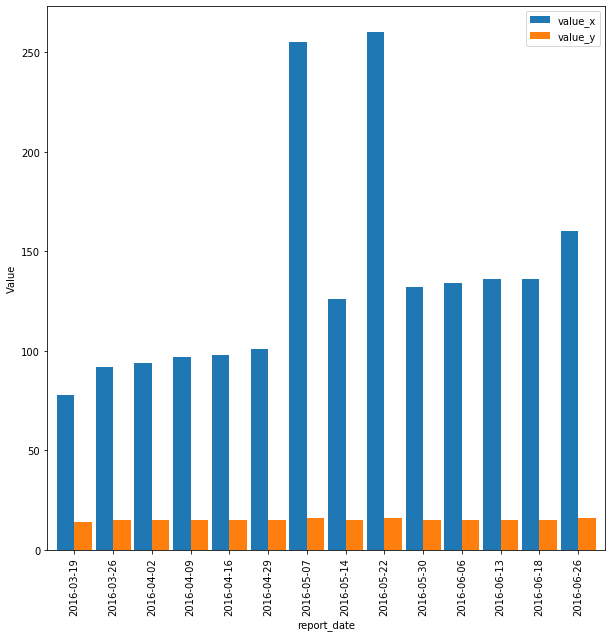

In [11]:
df4=pd.DataFrame(df2.groupby('report_date')['value'].sum())
final=df4.merge(right=df3.groupby('report_date')['value'].sum() ,on='report_date')
final.plot(kind='Bar',width=.9,figsize=(10,10))
plt.ylabel('Value')

## 3. Plot how data field values are distributed across the locations 'Argentina-Buenos_Aires', 'Argentina-CABA', 'Argentina-Catamarca' ?

In [17]:
df5=df.query('((location == "Argentina-CABA") or (location=="Argentina-Catamarca") or (location=="Argentina-Buenos_Aires"))') 
df5

,report_date,location,location_type,data_field,data_field_code,value,unit
0,2016-03-19,Argentina-Buenos_Aires,province,cumulative_confirmed_local_cases,AR0001,0,cases
1,2016-03-19,Argentina-Buenos_Aires,province,cumulative_probable_local_cases,AR0002,0,cases
2,2016-03-19,Argentina-Buenos_Aires,province,cumulative_confirmed_imported_cases,AR0003,2,cases
3,2016-03-19,Argentina-Buenos_Aires,province,cumulative_probable_imported_cases,AR0004,1,cases
4,2016-03-19,Argentina-Buenos_Aires,province,cumulative_cases_under_study,AR0005,127,cases
5,2016-03-19,Argentina-Buenos_Aires,province,cumulative_cases_discarded,AR0006,0,cases
6,2016-03-19,Argentina-CABA,province,cumulative_confirmed_local_cases,AR0001,0,cases
7,2016-03-19,Argentina-CABA,province,cumulative_probable_local_cases,AR0002,0,cases
8,2016-03-19,Argentina-CABA,province,cumulative_confirmed_imported_cases,AR0003,9,cases
9,2016-03-19,Argentina-CABA,province,cumulative_probable_imported_cases,AR0004,0,cases


In [27]:
df5['value'] = pd.to_numeric(df5.value)
df6= df5.groupby('location')
marca=df6.get_group("Argentina-Catamarca").groupby('data_field')['value'].sum()
caba=df6.get_group("Argentina-CABA").groupby('data_field')['value'].sum()
aires=df6.get_group("Argentina-Buenos_Aires").groupby('data_field')['value'].sum()

c:\users\anshu\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [23]:
labels = marca.index.tolist()

No handles with labels found to put in legend.


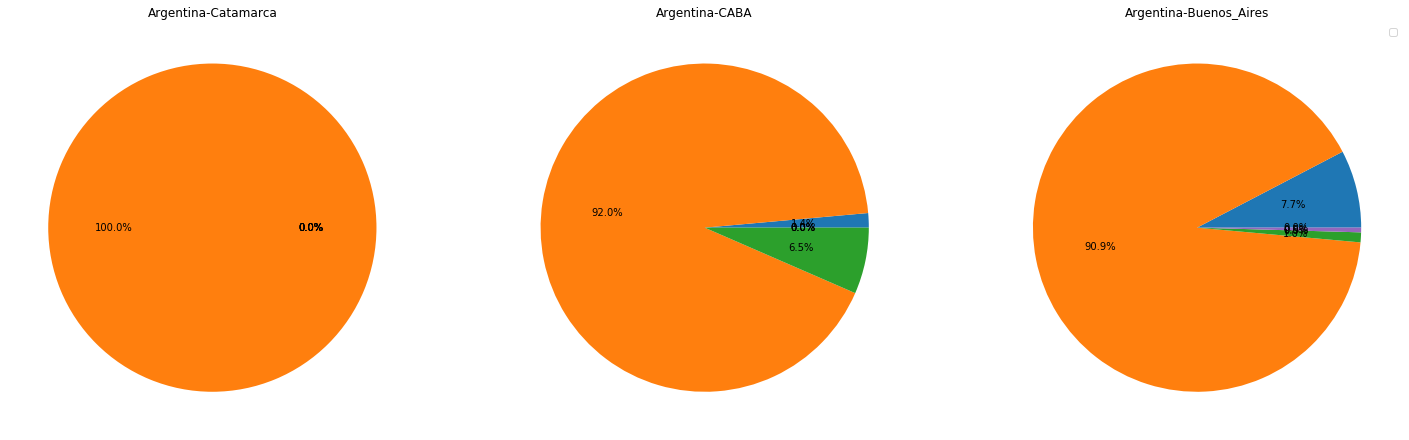

In [33]:

plt.subplots(figsize=(25,25))

plt.subplot(1,3,1)
plt.title('Argentina-Catamarca')
plt.pie(marca,autopct="%1.1f%%")
plt.subplot(1,3,2)
plt.title('Argentina-CABA')
plt.pie(caba,autopct="%1.1f%%")
plt.subplot(1,3,3)
plt.title('Argentina-Buenos_Aires')
plt.pie(aires,autopct="%1.1f%%")
plt.legend() 

## 4. Build a program to predict the correct word for wrongly typed word. for example whst => what, numbr =>number, good => good  ?

In [43]:
import re
from collections import Counter

def words(text): return re.findall(r'\w+', text.lower())

WORDS = Counter(words(open('big.txt').read()))

def P(word, N=sum(WORDS.values())): 
    
    return WORDS[word] / N

def correction(word): 
    
    return max(candidates(word), key=P)

def candidates(word): 

    return (known([word]) or known(edits1(word)) or known(edits2(word)) or [word])

def known(words): 
   
    return set(w for w in words if w in WORDS)

def edits1(word):

    letters    = 'abcdefghijklmnopqrstuvwxyz'
    splits     = [(word[:i], word[i:])    for i in range(len(word) + 1)]
    deletes    = [L + R[1:]               for L, R in splits if R]
    transposes = [L + R[1] + R[0] + R[2:] for L, R in splits if len(R)>1]
    replaces   = [L + c + R[1:]           for L, R in splits if R for c in letters]
    inserts    = [L + c + R               for L, R in splits for c in letters]
    return set(deletes + transposes + replaces + inserts)

def edits2(word): 
    
    return (e2 for e1 in edits1(word) for e2 in edits1(e1))

In [44]:
correction('haw')

'had'